In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("donnees_propre.csv")
pd.set_option('display.max_columns', None)  

In [3]:
df# Afficher tous les noms uniques dans la colonne 'Marque'
marques_uniques = df['marque'].unique()
print(marques_uniques)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [10]:
# Créer un dictionnaire qui associe chaque marque à son pays d'origine
pays = {'Honda': 'Japon', 'Jaguar': 'UK' , 'alfa-romero':"italie", 'audi':"allemand", 'bmw':"allemand" ,'chevrolet':"usa", 'dodge':"usa",
              'isuzu': 'Japon', 'buick' :"usa",'mercury':"usa", 'mitsubishi': 'Japon', 'nissan': 'Japon', 'peugeot':"français" ,'plymouth':"usa",
                'porsche':"allemand", 'renault':"français" ,'saab':"suedeois", 'subaru': 'Japon', 'toyota': 'Japon', 'volkswagen':"allemand", 'volvo':"suedeois" }

# Créer une nouvelle colonne 'pays' dans le dataframe en utilisant le dictionnaire 'pays'
df['pays'] = df['marque'].map(pays)

# Vérifier que la nouvelle colonne a été créée correctement
df

,marque,modele,prix,risque_assurance,type_de_carburant,aspiration,nombre_de_portes,carrosserie,roues_motrices,emplacement_moteur,empattement,longueur_voiture,largeur_voiture,hauteur_voiture,poids_à_vide,type_de_moteur,nombre_de_cylindres,taille_moteur_en_litres,système_de_carburant,alésage,course,taux_de_compression,puissance,rpm_max,consommation_ville,consommation_autoroute,pays
0,alfa-romero,giulia,13495.0,3,essence,std,2,cabriolet,propulsion,avant,2.25044,4.28752,1.62814,1.23952,1156.792,dohc,4,2.130323,mpfi,3.47,2.68,9.0,111,5000,11.20,8.71,italie
1,alfa-romero,stelvio,16500.0,3,essence,std,2,cabriolet,propulsion,avant,2.25044,4.28752,1.62814,1.23952,1156.792,dohc,4,2.130323,mpfi,3.47,2.68,9.0,111,5000,11.20,8.71,italie
2,alfa-romero,Quadrifoglio,16500.0,1,essence,std,2,hayon,propulsion,avant,2.40030,4.34848,1.66370,1.33096,1281.642,ohcv,6,2.490839,mpfi,2.68,3.47,9.0,154,5000,12.38,9.05,italie
3,audi,100 ls,13950.0,2,essence,std,4,berline,traction,avant,2.53492,4.48564,1.68148,1.37922,1060.998,ohc,4,1.786194,mpfi,3.19,3.40,10.0,102,5500,9.80,7.84,allemand
4,audi,100ls,17450.0,2,essence,std,4,berline,quatre roues motrices,avant,2.52476,4.48564,1.68656,1.37922,1282.096,ohc,5,2.228646,mpfi,3.19,3.40,8.0,115,5500,13.07,10.69,allemand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,145e,16845.0,-1,essence,std,4,berline,propulsion,avant,2.77114,4.79552,1.75006,1.40970,1340.208,ohc,4,2.310581,mpfi,3.78,3.15,9.5,114,5400,10.23,8.40,suedeois
197,volvo,144ea,19045.0,-1,essence,turbo,4,berline,propulsion,avant,2.77114,4.79552,1.74752,1.40970,1384.246,ohc,4,2.310581,mpfi,3.78,3.15,8.7,160,5300,12.38,9.41,suedeois
198,volvo,244dl,21485.0,-1,essence,std,4,berline,propulsion,avant,2.77114,4.79552,1.75006,1.40970,1367.448,ohcv,6,2.834968,mpfi,3.58,2.87,8.8,134,5500,13.07,10.23,suedeois
199,volvo,246,22470.0,-1,diesel,turbo,4,berline,propulsion,avant,2.77114,4.79552,1.75006,1.40970,1460.518,ohc,6,2.376129,idi,3.01,3.40,23.0,106,4800,9.05,8.71,suedeois


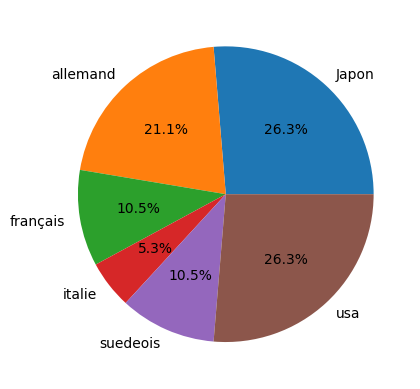

In [12]:
import matplotlib.pyplot as plt

# Supposons que votre dataframe s'appelle 'df' et que la colonne pour les pays s'appelle 'pays'
data = df.groupby('pays')['marque'].nunique().reset_index()
data.columns = ['pays', 'nombre_de_marques']

plt.pie(data['nombre_de_marques'], labels=data['pays'], autopct='%1.1f%%')
plt.show()


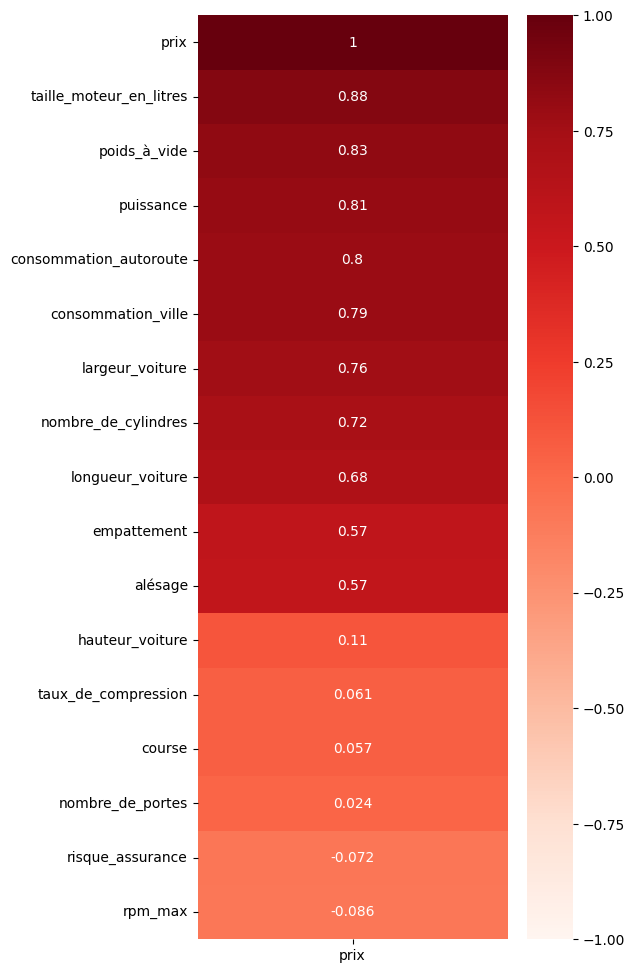

In [2]:
fig, ax = plt.subplots(figsize=(5,12))
sns.heatmap(df.corr(numeric_only = True)[["prix"]].sort_values('prix'), vmax=1, vmin=-1, cmap='Reds', annot=True, ax=ax)
ax.invert_yaxis()

In [3]:
profile =ProfileReport(df, title = "Profiling Report")

In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
print(df.columns)



Index(['marque', 'modele', 'prix', 'risque_assurance', 'type_de_carburant',
       'aspiration', 'nombre_de_portes', 'carrosserie', 'roues_motrices',
       'emplacement_moteur', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_à_vide', 'type_de_moteur',
       'nombre_de_cylindres', 'taille_moteur_en_litres',
       'système_de_carburant', 'alésage', 'course', 'taux_de_compression',
       'puissance', 'rpm_max', 'consommation_ville', 'consommation_autoroute'],
      dtype='object')


In [6]:
# Afficher tous les noms uniques dans la colonne 'Marque'
marques_uniques = df['modele'].unique()
print(len(marques_uniques))

125
